# Study Point
- matplot의 line그래프를 대상으로 챠트의 각 요소를 익힌다
- bar, pie, histogram, scatter 그래프를 그려본다
- subplot을 이용해서 여러 개의 그래프를 한장에 그려본다
- pandas 패키지의 DataFrame을 그래프로 그려본다
- seaborn패키지를 이용해서 좀 더 다양한 그래프를 그려본다
- 지도정보를 이용해서 지도에 시각화를 해 본다

참고자료 : http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [1]:
#Configure Defaults
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
width = 700

import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'

# Basic
import numpy as np
import pandas as pd
import missingno as msno
import pickle
import os
import math 


#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'
import missingno as msno

## pandas plot - box - groupby

In [2]:
plt.rcParams["figure.figsize"] = (15,3)

np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50,2))
df_box['g'] = np.random.choice(['A', 'B'], size =50)

In [3]:
df_box.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,0.887163,B
3,0.859588,-0.636524,A
4,0.015696,-2.242685,B


In [4]:
df_box.loc
df_box.loc[:, 1].head()
df_box.loc[df_box['g'] == 'B', 1].head()

0   -1.190976
1   -0.312652
2    0.887163
3   -0.636524
4   -2.242685
Name: 1, dtype: float64

2     0.887163
4    -2.242685
10   -0.655969
11    0.553439
12   -0.469305
Name: 1, dtype: float64

In [5]:
df_box.loc[df_box['g'] == 'B', 1] += 3

In [6]:
df_box.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


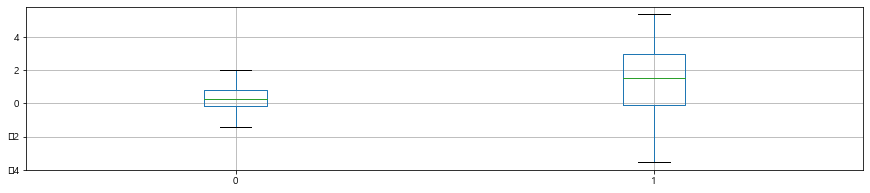

In [7]:
bp = df_box.boxplot()

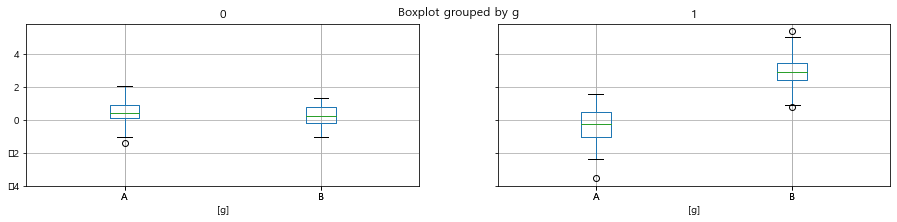

In [8]:
bp = df_box.boxplot(by='g')

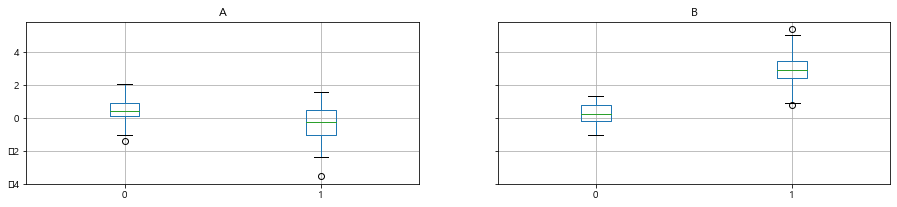

In [9]:
bp = df_box.groupby('g').boxplot()

In [10]:
df_box.loc[df_box['g'] == 'B', 1]

2     3.887163
4     0.757315
10    2.344031
11    3.553439
12    2.530695
13    1.182973
14    4.058969
16    4.045938
17    2.877908
18    2.677205
19    5.390961
21    0.925022
22    2.102843
23    3.018289
24    3.215269
25    1.554190
27    2.855380
28    2.964487
30    2.929655
35    3.462060
36    3.523508
37    5.007843
38    1.847341
39    3.039513
41    3.152631
45    2.600035
46    2.415282
47    2.918053
Name: 1, dtype: float64

## pandas plot - Area Plot

<AxesSubplot:>

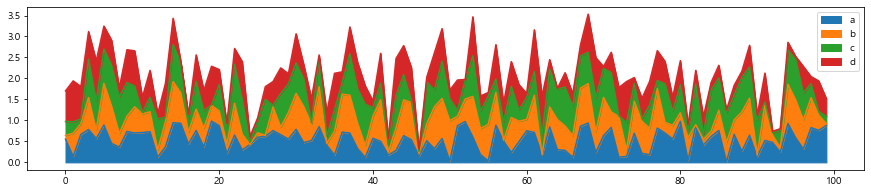

In [11]:
df =pd.DataFrame(np.random.rand(100,4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

<AxesSubplot:>

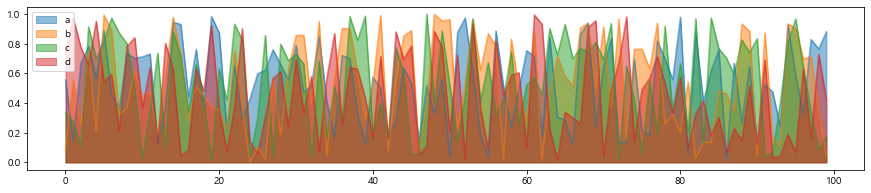

In [12]:
df.plot.area(stacked=False)

## pandas plot - scatter

<AxesSubplot:xlabel='a', ylabel='b'>

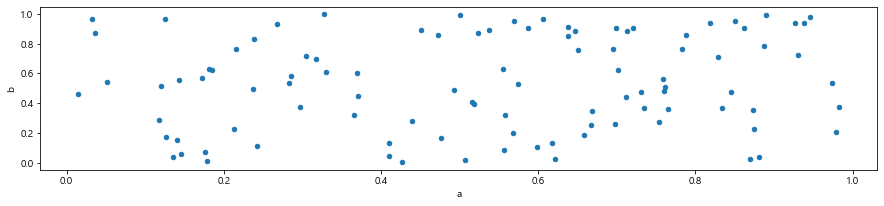

In [13]:
df.plot.scatter(x='a', y='b')

<AxesSubplot:xlabel='a', ylabel='b'>

<AxesSubplot:xlabel='c', ylabel='d'>

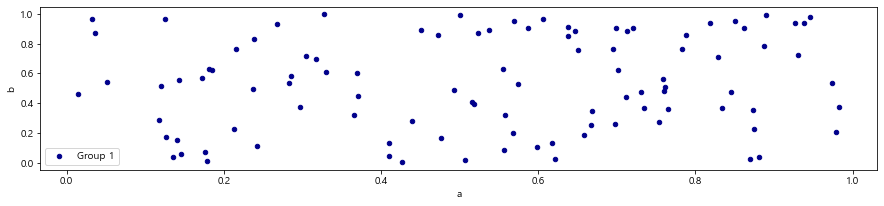

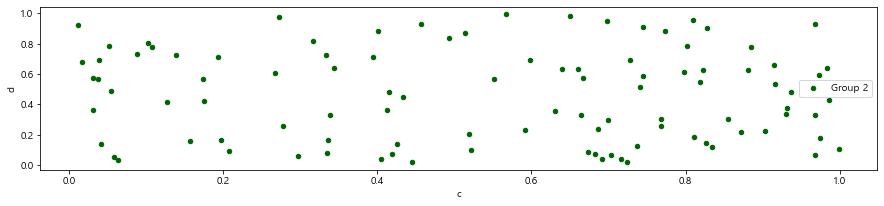

In [14]:
df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2')

<AxesSubplot:xlabel='c', ylabel='d'>

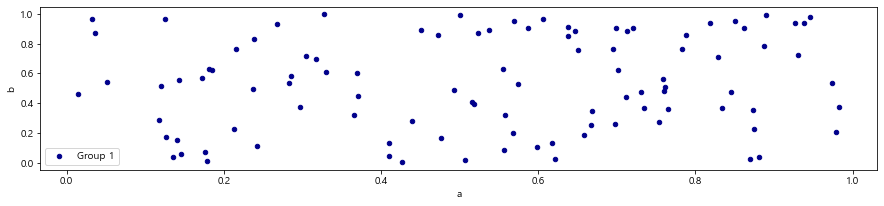

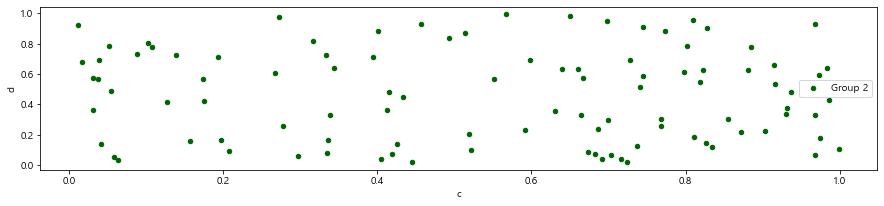

In [15]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2')

<AxesSubplot:xlabel='c', ylabel='d'>

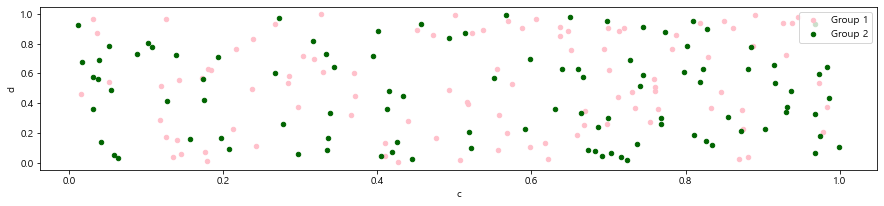

In [16]:
ax = df.plot.scatter(x='a', y='b', color='Pink', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

<AxesSubplot:xlabel='a', ylabel='b'>

<AxesSubplot:xlabel='a', ylabel='b'>

<AxesSubplot:xlabel='a', ylabel='b'>

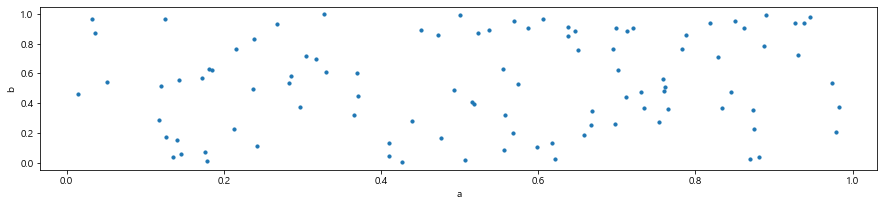

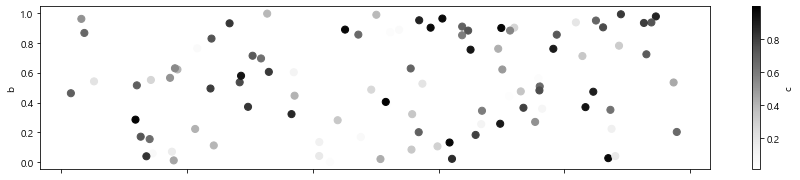

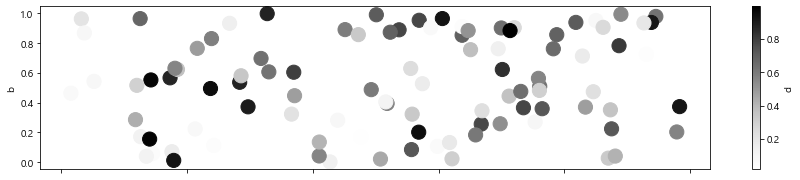

In [17]:
df.plot.scatter(x='a', y='b', s=10)
df.plot.scatter(x='a', y='b', c='c', s=50) # c는 색상을 지정
df.plot.scatter(x='a', y='b', c='d', s=200)

<AxesSubplot:xlabel='a', ylabel='b'>

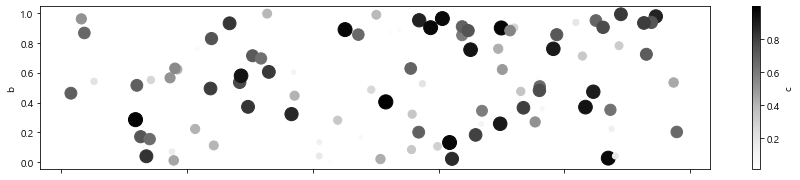

In [18]:
df.plot.scatter(x='a', y='b', c='c', s=df['c']*200)

## pandas plot - Hexagonal Bin Plot

<AxesSubplot:xlabel='a', ylabel='b'>

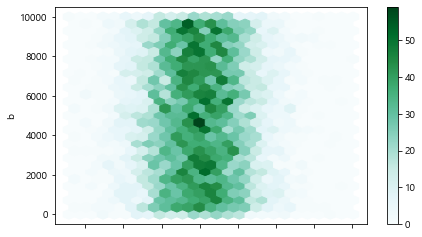

In [19]:
plt.rcParams["figure.figsize"] = (7,4)
N = 10000
df =pd.DataFrame(np.random.randn(N,2), columns=['a', 'b'])
df['b'] =df['b'] + np.arange(N)
df.plot.hexbin(x='a', y='b', gridsize =25)

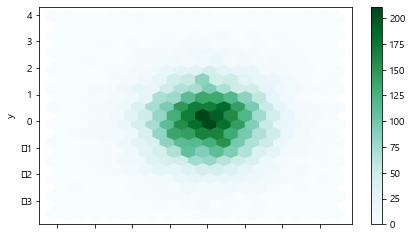

In [20]:
n = 10000
df = pd.DataFrame({'x': np.random.randn(n),'y': np.random.randn(n)})
ax= df.plot.hexbin(x='x', y='y', gridsize=20)

<AxesSubplot:xlabel='a', ylabel='b'>

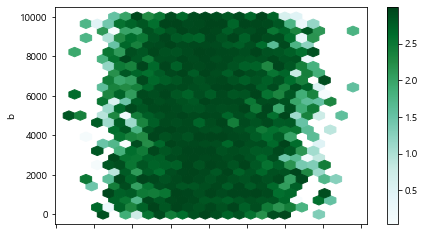

In [21]:
plt.rcParams["figure.figsize"] = (7,4)
N = 10000
df =pd.DataFrame(np.random.randn(N,2), columns=['a', 'b'])
df['b'] =df['b'] = df['b'] + np.arange(N)
df['z'] = np.random.uniform(0,3,N)
df.plot.hexbin(x='a', y='b',C='z', reduce_C_function=np.max, gridsize =25)

## pandas plot - Pie plot

<AxesSubplot:ylabel='series'>

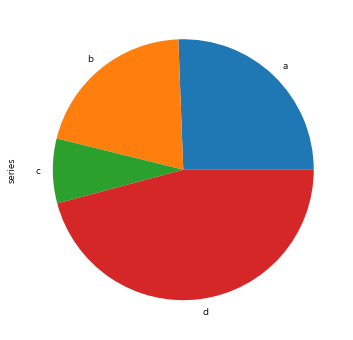

In [22]:
series = pd.Series(3*np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6,6))

<AxesSubplot:ylabel='series'>

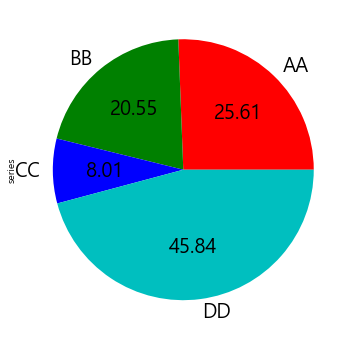

In [23]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', fontsize=20, figsize=(6,6))

In [24]:
[0,1]*4

[0, 1, 0, 1, 0, 1, 0, 1]

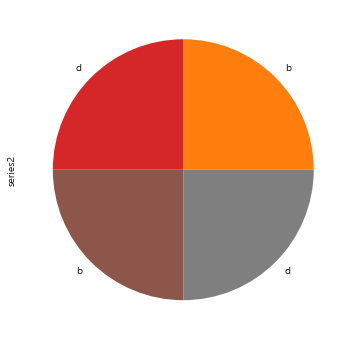

In [25]:
series= pd.Series([0,1]*4, index=['a', 'b', 'c', 'd']*2, name='series2')
ax = series.plot.pie(figsize=(6,6))

,x,y
a,2.769392,2.188421
b,1.759706,1.022355
c,2.889678,2.720975
d,2.503899,0.835927


array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

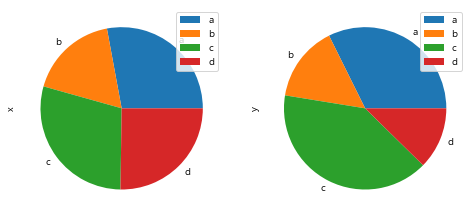

In [26]:
df = pd.DataFrame(3*np.random.rand(4,2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df
df.plot.pie(subplots=True, figsize=(8,4))

## pandas plot - subplot

,A,B,C,D
0,-1.801910,-1.513461,1.172834,0.404627
1,-0.806232,0.299901,1.925378,0.067774
2,0.108955,-0.195511,-0.273892,0.306679


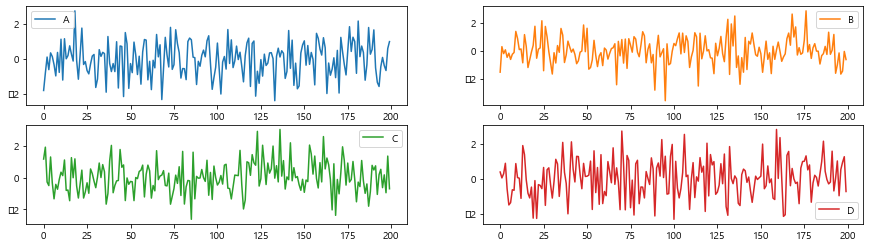

In [27]:
df =pd.DataFrame(np.random.randn(200, 4), columns=list('ABCD'))
df.head(3)
ax= df.plot(subplots=True, layout=(2,-1), figsize=(15,4), sharex=False)

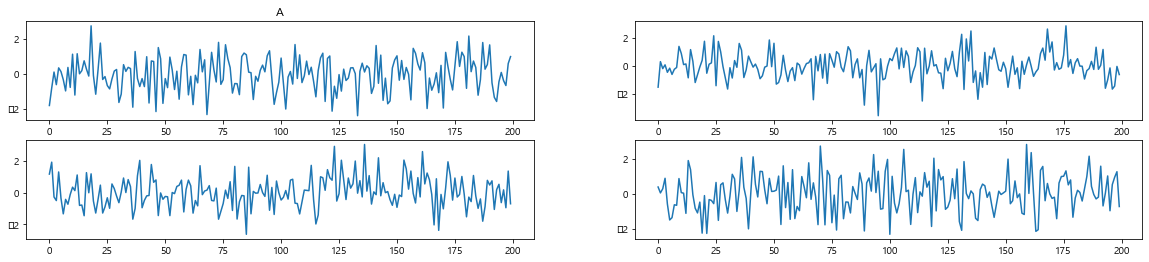

In [28]:
plt.rcParams["figure.figsize"] = (20,4)
fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,0].set_title('A');
df['C'].plot(ax=axes[1,0]); axes[0,0].set_title('A');
df['D'].plot(ax=axes[1,1]); axes[0,0].set_title('A');

# Seaborn - Scatter

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

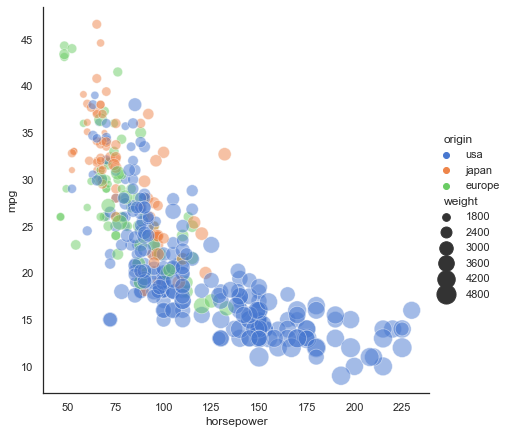

In [29]:
import seaborn as sns
sns.set(style='white')
mpg=sns.load_dataset('mpg')
mpg.columns
sns.relplot(x='horsepower', y='mpg', hue='origin', size ='weight',
          sizes=(40,400), alpha=0.5, palette='muted', height=6, data=mpg)

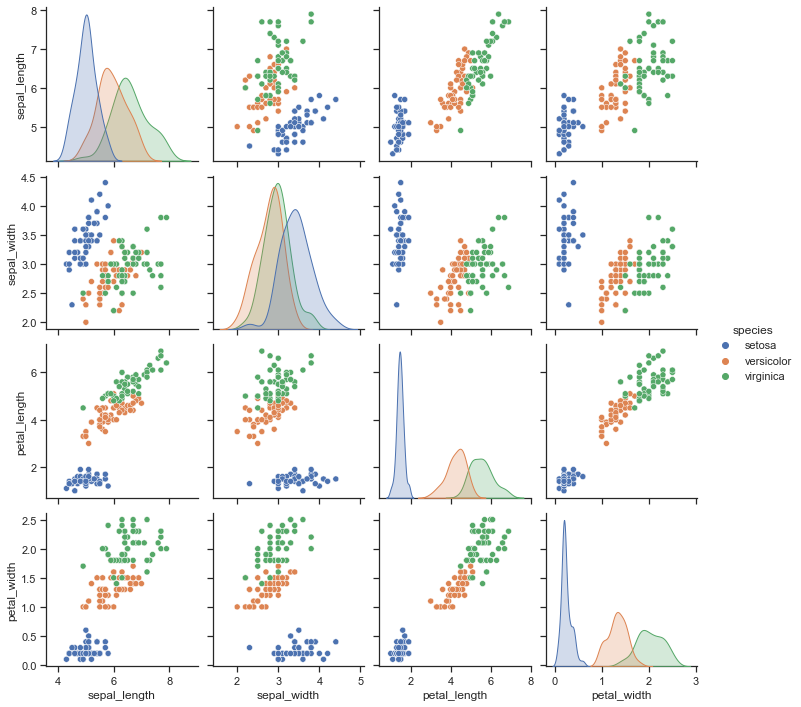

In [30]:
sns.set(style='ticks')
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')

array([[0.96761397, 0.88835911, 0.51141633, 0.5882056 , 0.74871676],
       [0.75911729, 0.16508575, 0.26979184, 0.09866113, 0.46132543],
       [0.60621934, 0.01167729, 0.60611319, 0.82923557, 0.75035089],
       [0.43949406, 0.24528084, 0.7413736 , 0.81406494, 0.21902597],
       [0.96675784, 0.60371578, 0.7632092 , 0.02680106, 0.21250535]])

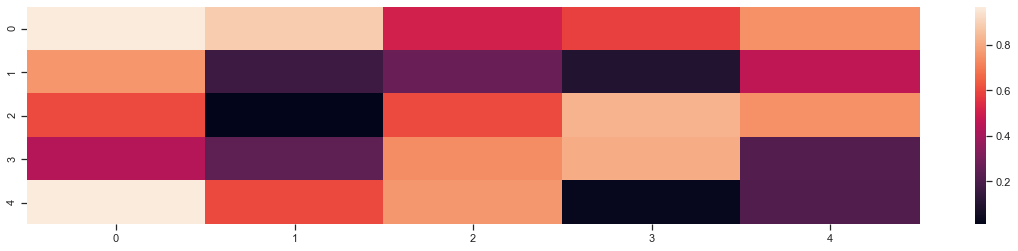

In [31]:
uniform_data = np.random.rand(5, 5)
uniform_data
ax = sns.heatmap(uniform_data)

In [32]:
sns.set()
flights = sns.load_dataset('flights')
flights =flights.pivot('month', 'year', 'passengers')
flights.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419


<AxesSubplot:xlabel='year', ylabel='month'>

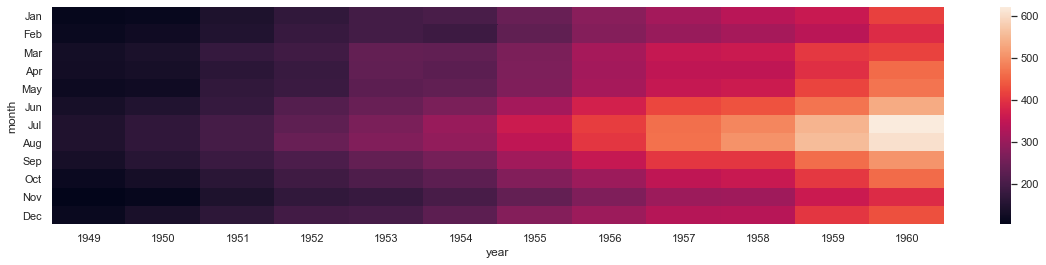

In [33]:
sns.heatmap(flights)

<AxesSubplot:xlabel='year', ylabel='month'>

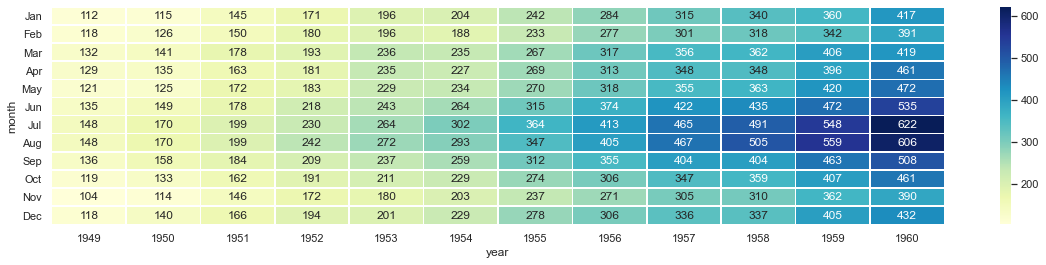

In [34]:
sns.heatmap(flights, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")

# Seaborn - 선형관계 - multiple linear regression

In [35]:
iris = sns.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

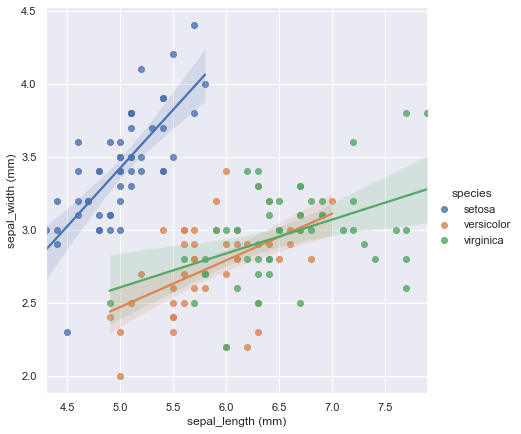

In [36]:
g = sns.lmplot(x='sepal_length', y='sepal_width', hue='species', truncate=True,
            height=6, data=iris)
g.set_axis_labels('sepal_length (mm)', 'sepal_width (mm)')

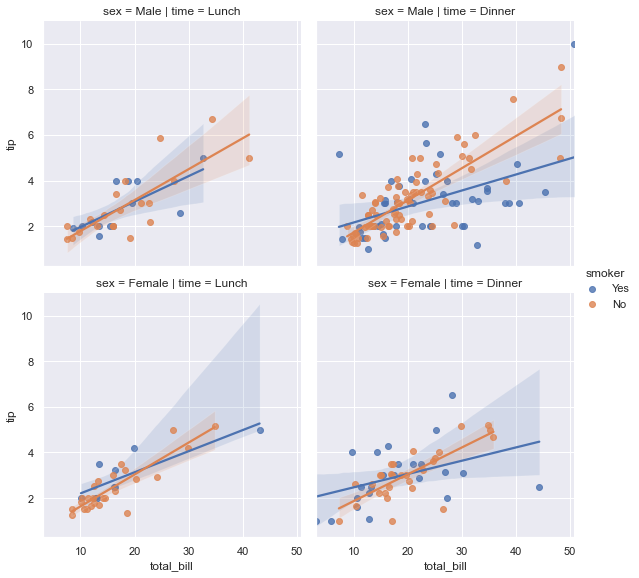

In [37]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', 
           col='time', row='sex', height = 4, data=sns.load_dataset('tips'))

# Seaborn - 분류형 변수(category)

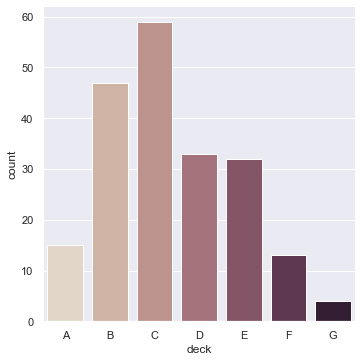

In [38]:
sns.catplot(x='deck', kind='count', palette='ch:.25', data=sns.load_dataset('titanic'))

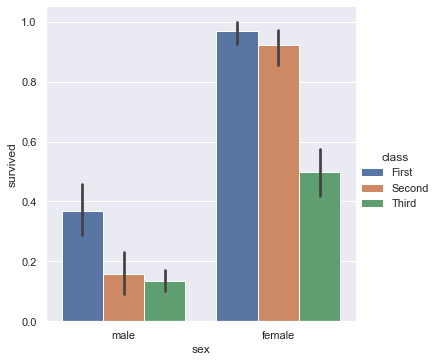

In [39]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=sns.load_dataset('titanic'))

# Seaborn - 분류형 변수(category) - Point plots

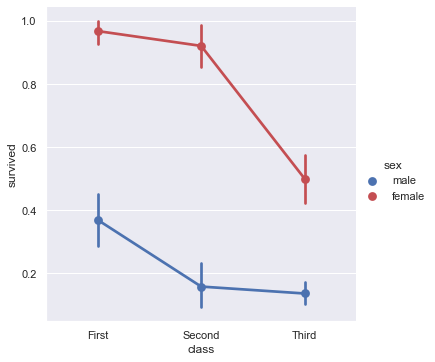

In [40]:
sns.catplot(x='class', y='survived', hue='sex',
            palette={'male':'b', 'female':'r'},
            kind='point', data=sns.load_dataset('titanic'))

# Seaborn - 분류형 변수(category) - scatter plots

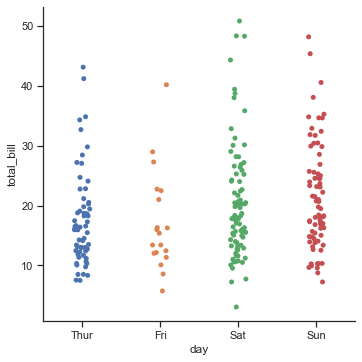

In [41]:
sns.set(style='ticks', color_codes=True)
sns.catplot(x='day', y='total_bill', data=sns.load_dataset('tips'))

# Seaborn - 분류형 변수(category) - scatter plots

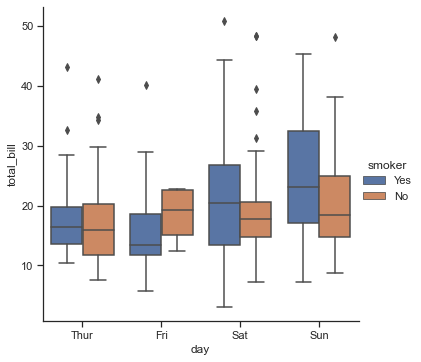

In [42]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=sns.load_dataset('tips'))

# Seaborn - 분류형 변수(category) - violin

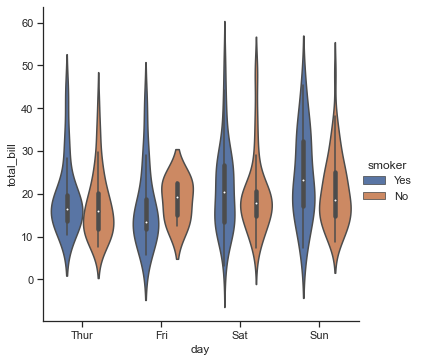

In [43]:
sns.set(style='ticks', color_codes=True)
sns.catplot(x='day', y='total_bill', hue='smoker', kind='violin', data=sns.load_dataset('tips'))

## seaborn - 분포

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

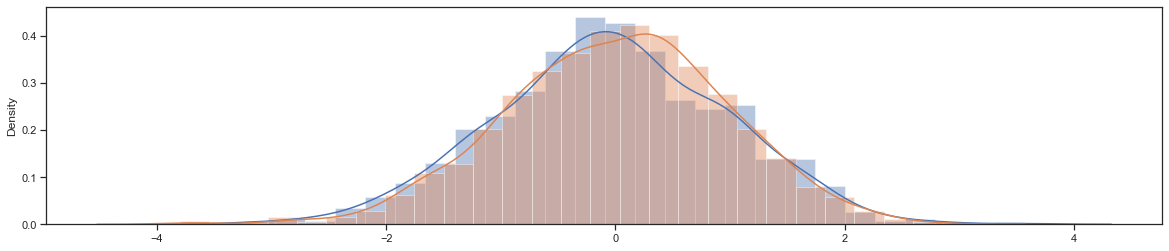

In [44]:
from scipy import stats

np.random.seed(123)

x1= np.random.randn(1000)
x2= np.random.normal(size = 1000)
sns.distplot(x1)
sns.distplot(x2)

## seaborn - 분포 - Scatterplots

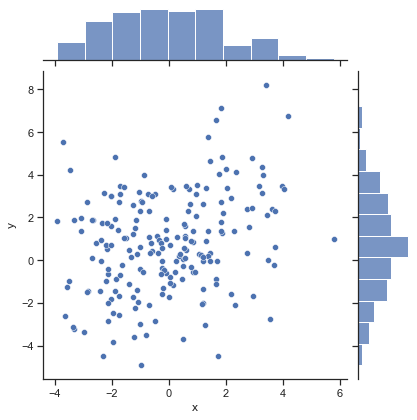

In [45]:
mean, cov =[0,1], [(1,5), (5,1)]
data =np.random.multivariate_normal(mean, cov, 200)
df =pd.DataFrame(data, columns=['x', 'y'])

sns.jointplot(x='x', y='y', data=df)

## seaborn - 분포 - Hexbin plot

In [46]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

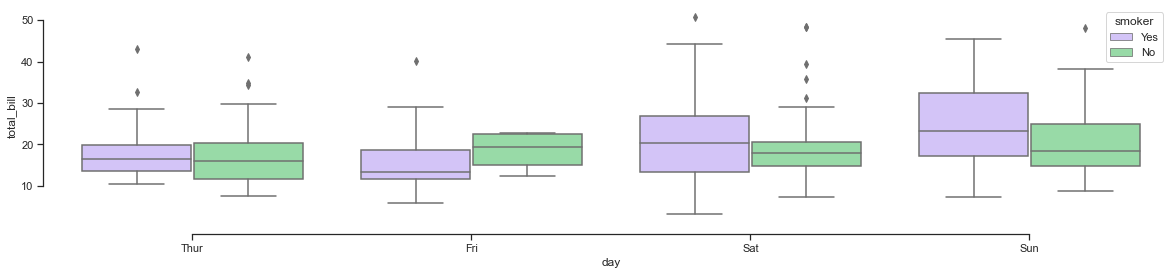

In [47]:
sns.set(style='ticks', palette='pastel')
sns.boxplot(x='day', y='total_bill', hue='smoker', palette=['m', 'g'], data=sns.load_dataset('tips'))
sns.despine(offset=10, trim=True)

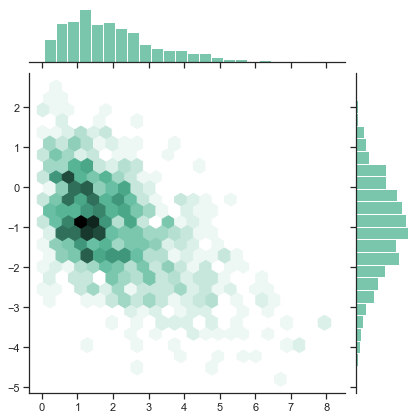

In [48]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

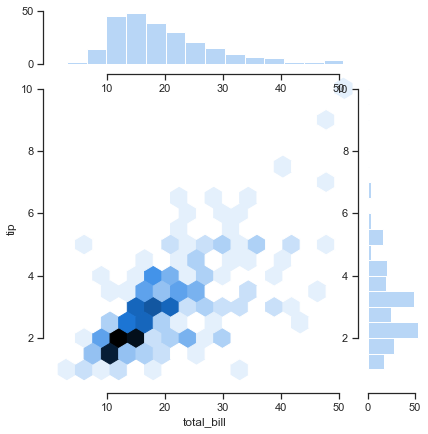

In [49]:
tips = sns.load_dataset('tips')
sns.jointplot(x='total_bill', y='tip', kind = 'hex',data=tips)
sns.despine(offset=10, trim=True)

## seaborn - 분포 - Linear regression

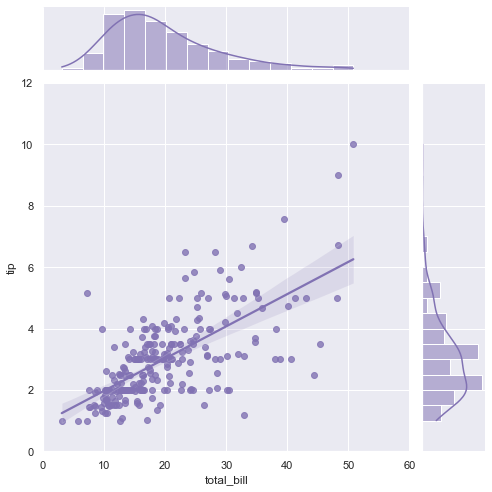

In [50]:
sns.set(style='darkgrid')

sns.jointplot(x='total_bill', y='tip', kind = 'reg',
              xlim=(0,60), ylim=(0,12), color='m', height =7,
              data=tips)

# 사례

https://levelup.gitconnected.com/compare-contrast-eda-of-datasets-with-many-features-f9665da15132

In [120]:
df = sns.load_dataset('titanic')
df.shape
df

(891, 15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [134]:
df.loc[df.pclass == 1, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [135]:
df.pclass == 1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: pclass, Length: 891, dtype: bool

In [157]:
select = list(np.random.choice(591, 100))
test = df[df.index.isin (select)]
train = df[~df.index.isin (select)]
train.shape
test.shape

(800, 15)

(91, 15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


<AxesSubplot:>

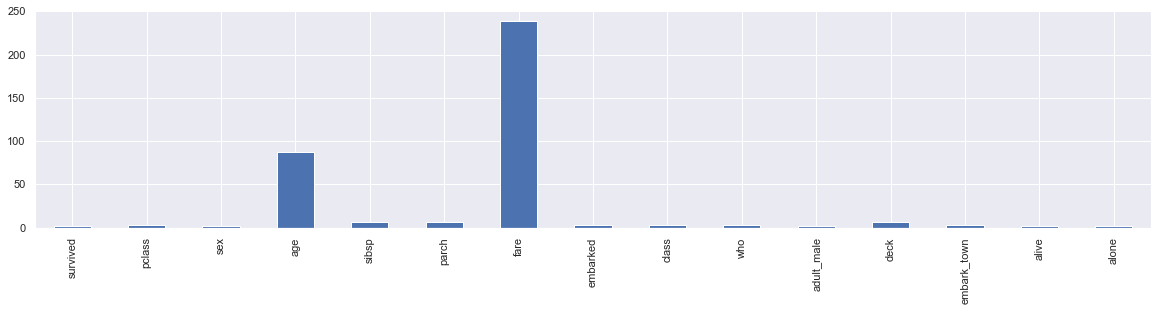

In [158]:
train[train.values != 'object']
train[train.values != 'object'].nunique().plot.bar()

In [166]:
# Data Type Comparison
s1 = train.dtypes
s2 = test.dtypes

s1.compare(s2)

,self,other


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [204]:
X = df.drop('survived', axis=1)

## Contrast Distributions of Train & Test Data
### 1. Continuous features, we can apply Seaborn histograms as below:

In [206]:
con_var = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
con_var

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

<AxesSubplot:xlabel='pclass', ylabel='Count'>

<AxesSubplot:xlabel='age', ylabel='Count'>

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

<AxesSubplot:xlabel='parch', ylabel='Count'>

<AxesSubplot:xlabel='fare', ylabel='Count'>

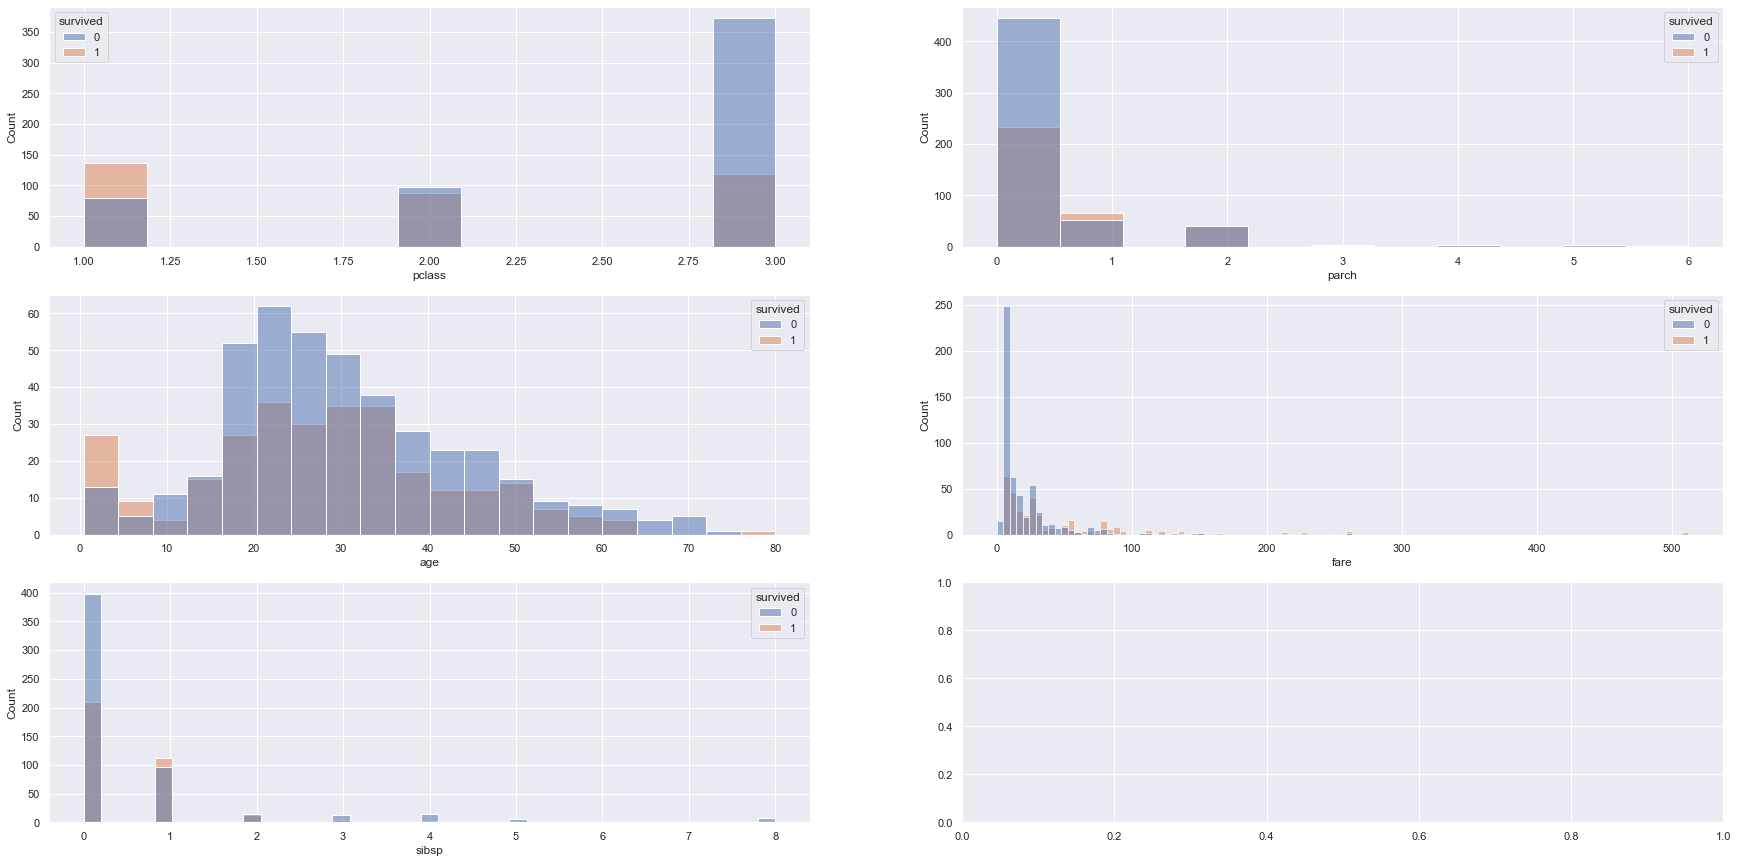

In [207]:
f, axes = plt.subplots(3,2 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(con_var):
    sns.histplot(data=df, x = feature, hue="survived", ax=axes[i%3, i//3])

## 2. categorical features, we can apply Seaborn countplot as below:

In [217]:
cat_var = X.columns[(X.dtypes == 'object') | (X.dtypes == 'category')]
cat_var

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

<AxesSubplot:xlabel='sex', ylabel='count'>

<AxesSubplot:xlabel='embarked', ylabel='count'>

<AxesSubplot:xlabel='class', ylabel='count'>

<AxesSubplot:xlabel='who', ylabel='count'>

<AxesSubplot:xlabel='deck', ylabel='count'>

<AxesSubplot:xlabel='embark_town', ylabel='count'>

<AxesSubplot:xlabel='alive', ylabel='count'>

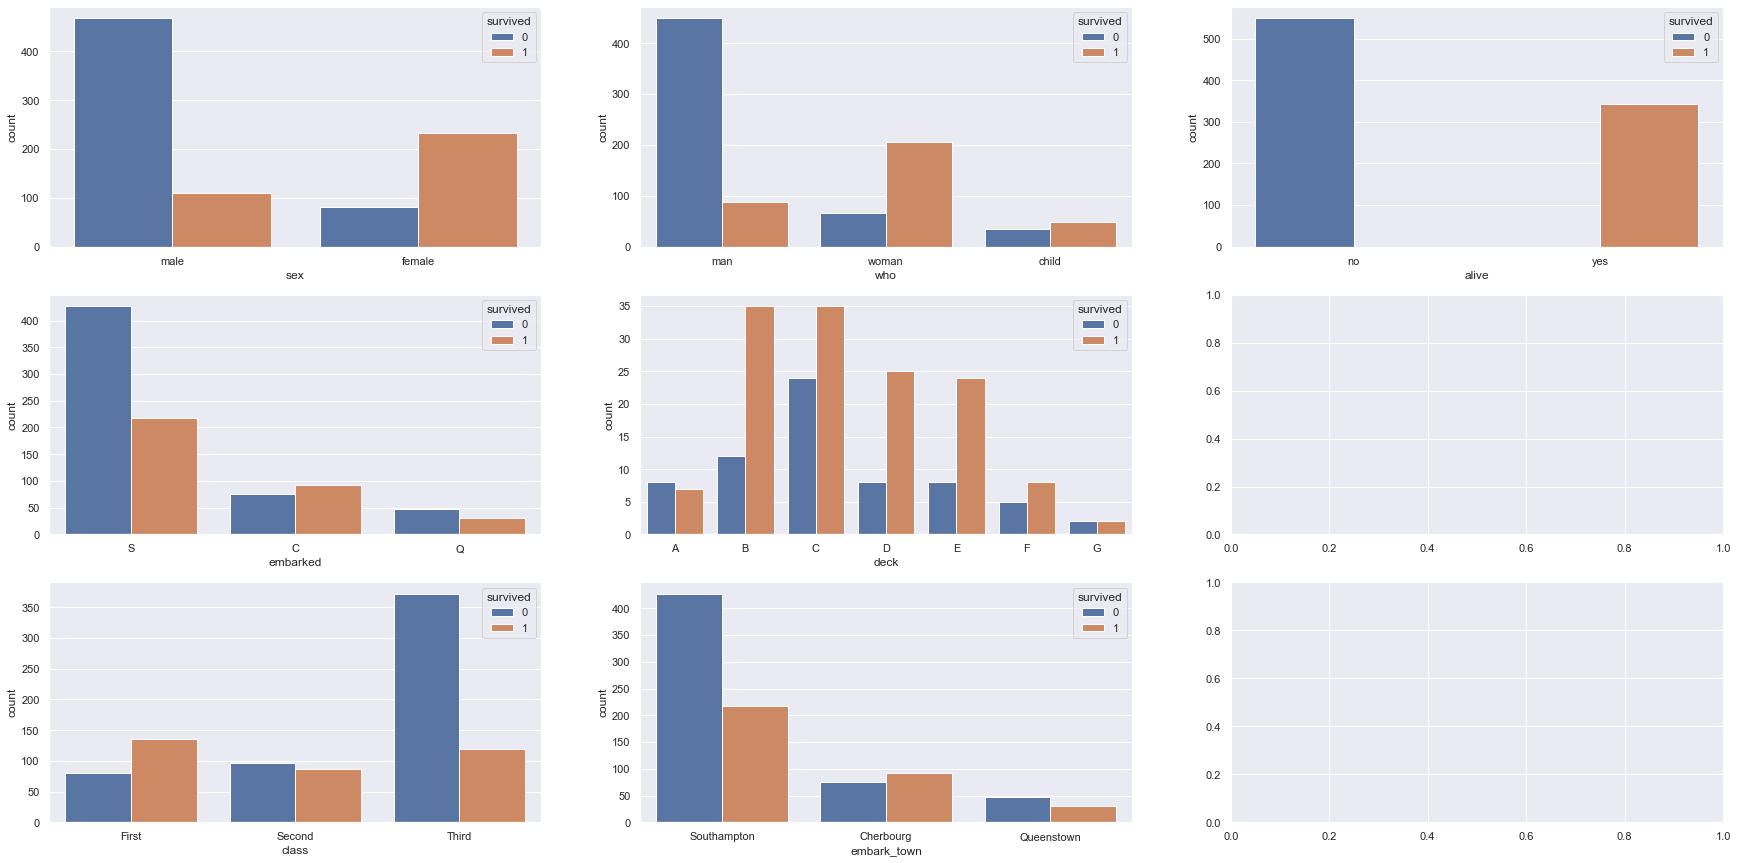

In [218]:
f, axes = plt.subplots(3,3 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(cat_var):
    sns.countplot(data=df, x = feature, hue="survived", ax=axes[i%3, i//3])

## 3. Compare Linearity between Response Variable and Continues Features

<AxesSubplot:xlabel='pclass', ylabel='fare'>

<AxesSubplot:xlabel='sex', ylabel='fare'>

<AxesSubplot:xlabel='age', ylabel='fare'>

<AxesSubplot:xlabel='sibsp', ylabel='fare'>

<AxesSubplot:xlabel='parch', ylabel='fare'>

<AxesSubplot:xlabel='fare', ylabel='fare'>

<AxesSubplot:xlabel='embarked', ylabel='fare'>

<AxesSubplot:xlabel='class', ylabel='fare'>

<AxesSubplot:xlabel='who', ylabel='fare'>

<AxesSubplot:xlabel='adult_male', ylabel='fare'>

<AxesSubplot:xlabel='deck', ylabel='fare'>

<AxesSubplot:xlabel='embark_town', ylabel='fare'>

<AxesSubplot:xlabel='alive', ylabel='fare'>

<AxesSubplot:xlabel='alone', ylabel='fare'>

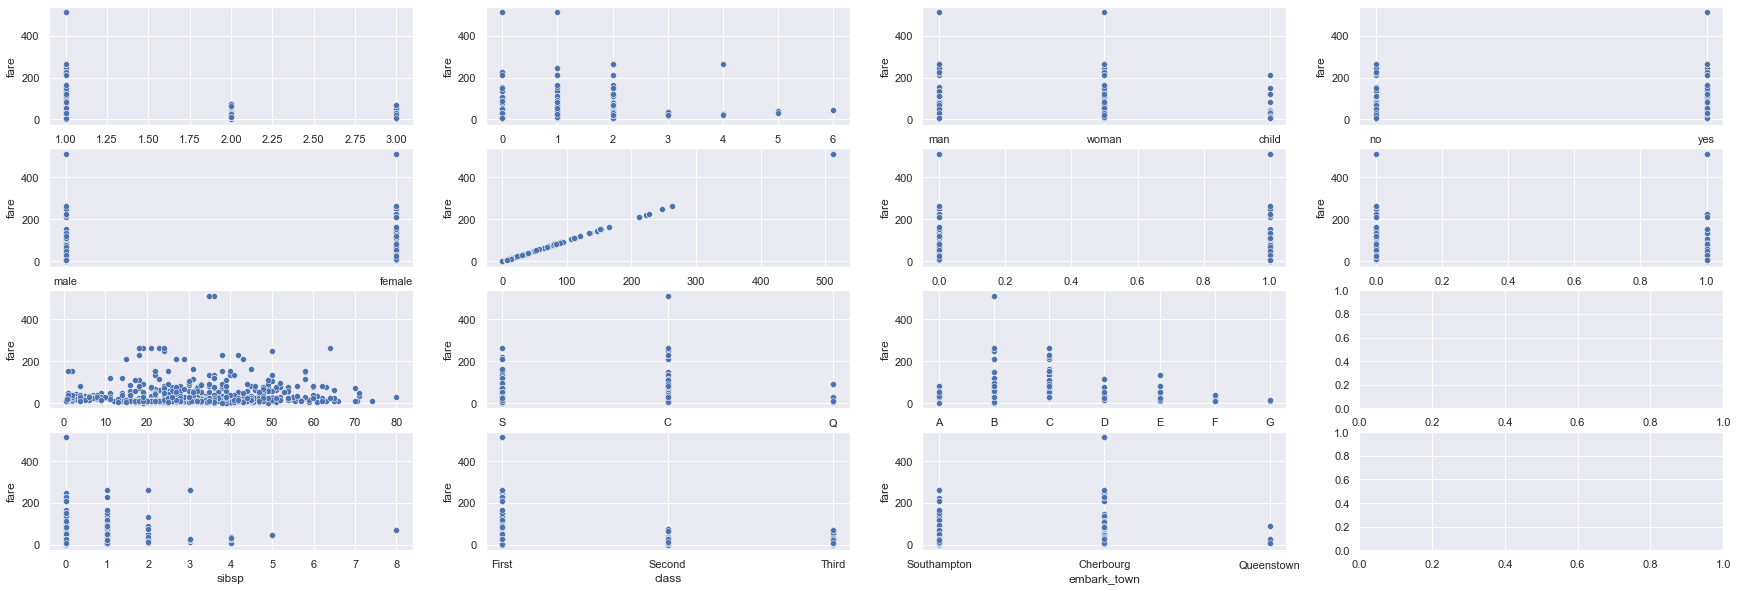

In [216]:
f, axes = plt.subplots(4,4 , figsize=(30, 10), sharex=False)
for i, feature in enumerate(X.columns):
    sns.scatterplot(data=df, x = feature, y= "fare",ax=axes[i%4, i//4])

## 4. Contrast Items of Categorical Features by the Response Variable

<AxesSubplot:xlabel='sex', ylabel='age'>

<AxesSubplot:xlabel='embarked', ylabel='age'>

<AxesSubplot:xlabel='class', ylabel='age'>

<AxesSubplot:xlabel='who', ylabel='age'>

<AxesSubplot:xlabel='deck', ylabel='age'>

<AxesSubplot:xlabel='embark_town', ylabel='age'>

<AxesSubplot:xlabel='alive', ylabel='age'>

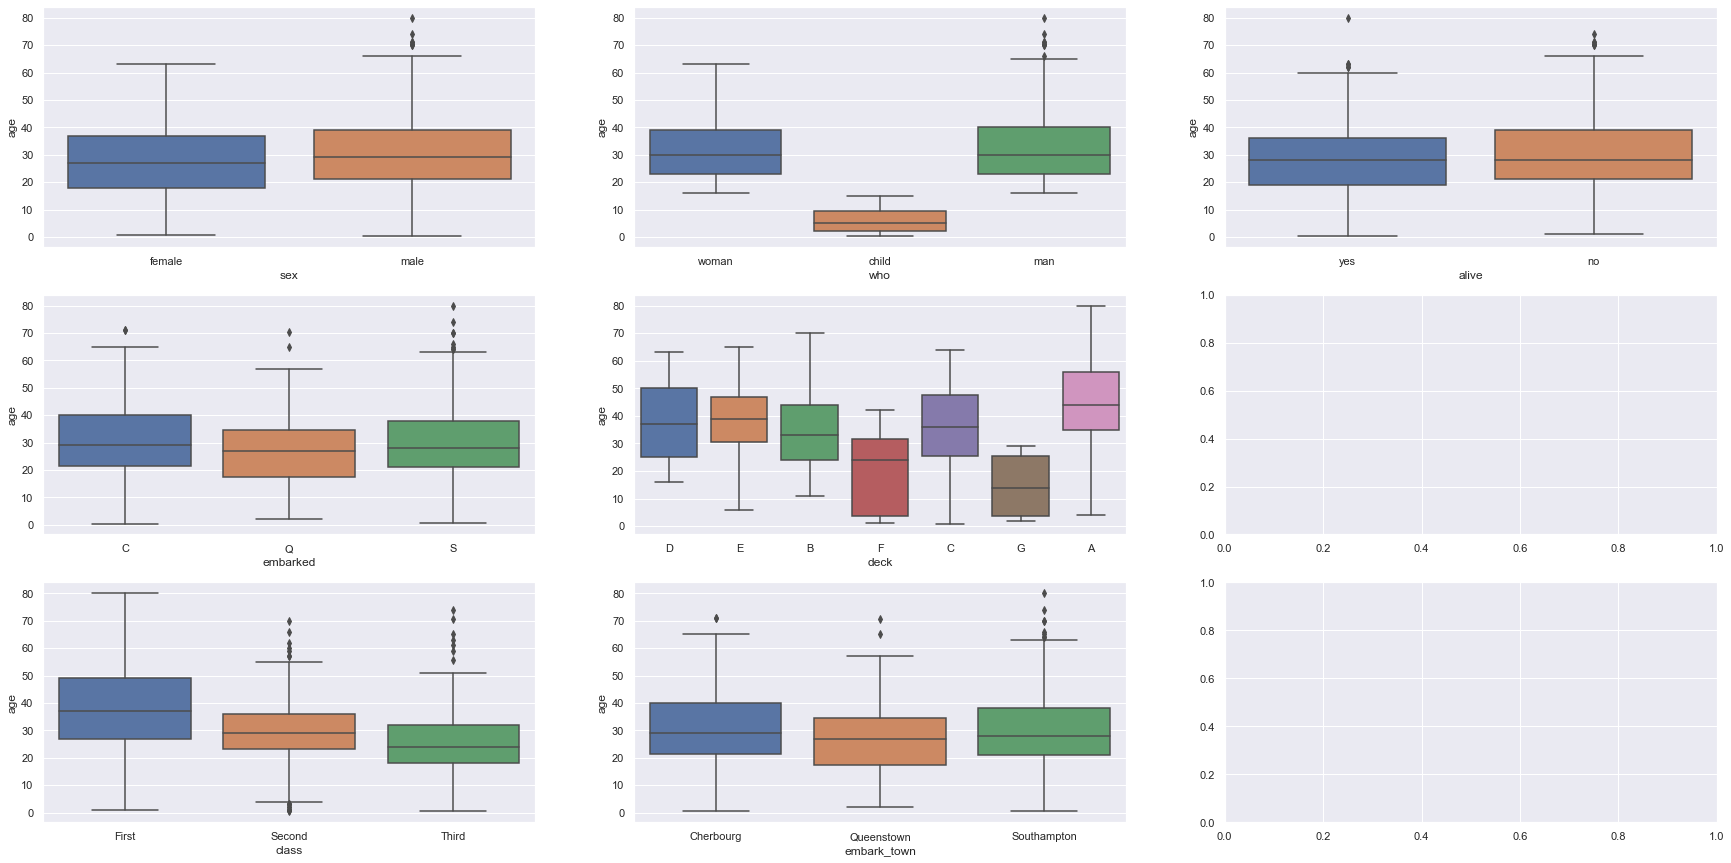

In [222]:
f, axes = plt.subplots(3, 3 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(cat_var):
    sort_list = sorted(df.groupby(feature)['survived'].mean().items(), key= lambda x:x[1], reverse = True)
    order_list = [x[0] for x in sort_list ]
    sns.boxplot(data = df, x = feature, y = 'age', order=order_list, ax=axes[i%3, i//3])
plt.show()

## End